In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Reading image
image=cv2.imread('/home/mush/Computer_vision/project1/Lane detection/test_image.jpg')
cv2.imshow('image',image)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [3]:
# converting to gray scale

def canny(image):
    gray=cv2.cvtColor(lane_img,cv2.COLOR_BGR2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    canny=cv2.Canny(blur,50,150)
    return canny


image = cv2.imread('/home/mush/Computer_vision/project1/Lane detection/test_image.jpg')
lane_img = np.copy(image)
canny_img=canny(lane_img)
cv2.imshow('canny',canny_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

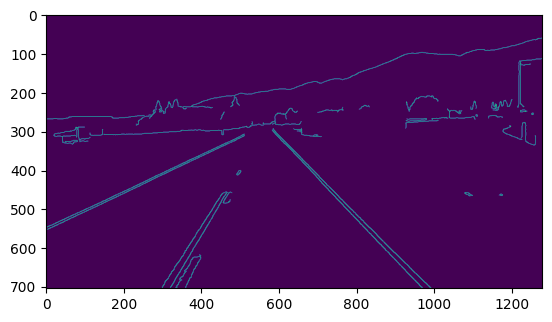

In [4]:
plt.imshow(canny_img)
plt.show()

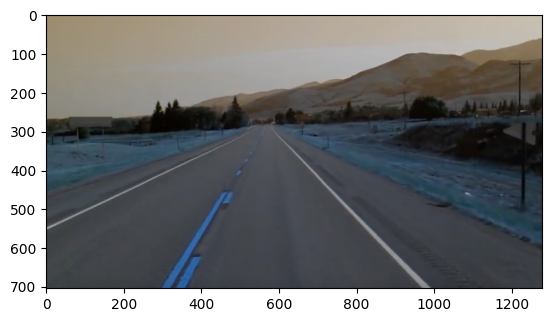

In [10]:
lines=[]
def display_lines(image,lines):
    line_img=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            #print(line) #2D array to 1d array
            x1, y1, x2, y2 = line.reshape(4)
        
        # for x1, y1, x2, y2 in lines:
        #     cv2.line(line_img,(x1,y1),(x2,y2),(0,0,255),10)
    return line_img

line_img=display_lines(image,lines)
cmb_img = cv2.addWeighted(lane_img,0.8,line_img,1,1)
plt.imshow(cmb_img)

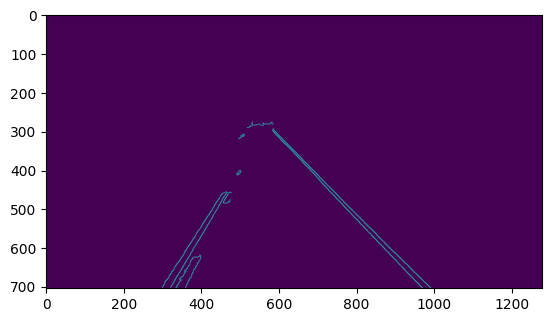

In [6]:
def roi(image): # REGION OF INTEREST
    height = image.shape[0]  # 2D row
    # x and y extends
    polygons = np.array([[(200, height), (1100, height), (550, 250)]])
    mask = np.zeros_like(image)  # same pixels as canny and 0 intensity
    cv2.fillPoly(mask, polygons, 255)
    masked_img = cv2.bitwise_and(image, mask)
    return masked_img


cropped_img = roi(canny_img)
lines = cv2.HoughLinesP(cropped_img, 2, np.pi/180, 100,np.array([]), minLineLength=40, maxLineGap=5)
# line_img = display_lines(lane_img, avg_lines)
plt.imshow(cropped_img)


In [13]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = (y1-intercept)/slope
    x2 = (y2-intercept)/slope
    return #np.array([x1, y1, x2, y2])

In [14]:
def avg_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_avg = np.average(left_fit, axis=0)
    right_fit_avg = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_avg)
    right_line = make_coordinates(image, right_fit_avg)
    return np.array([left_line, right_line])
    # print(left_fit_avg)
    # print(right_fit_avg)

avg_lines=avg_slope_intercept(lane_img, lines)
line_img=display_lines(lane_img,lines)
cmb_img=cv2.addWeighted(lane_img, 0.8, line_img, 1, 1)

TypeError: cannot unpack non-iterable numpy.float64 object

In [19]:
cap = cv2.VideoCapture('D:\Visualcode\DL\Lane_Detection\test2.mp4')
while (cap.isOpened()):
    _, frame = cap.read()
    cropped_img = roi(frame)
    lines = cv2.HoughLinesP(cropped_img, 2, np.pi/180, 100,
                            np.array([]), minLineLength=40, maxLineGap=5)
    avg_lines = avg_slope_intercept(frame, lines)
    line_img = display_lines(frame, avg_lines)
    cmb_img = cv2.addWeighted(frame, 0.8, line_img, 1, 1)
    cv2.imshow('result', cmb_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
